In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Input
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Conv2DTranspose, concatenate, merge, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
import keras.layers.advanced_activations
from keras.models import Model
import pandas as pd
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.preprocessing import image
import pandas as pd
import numpy as np
from scipy.misc import imresize
import glob
import os
from PIL import Image
from keras.applications.vgg16 import VGG16
from keras.optimizers import RMSprop
from keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


In [2]:
data_images = '/dataset/photo/'
test_images = '/test/test_photo/'

images = [data_images+i for i in os.listdir(data_images)]
test_images = [test_images+i for i in os.listdir(test_images)]
test_sketches = []
sketches = []

for img in images:
    str = img.split('.')[0] + '-sz1.jpg'
    str = str.replace('photo', 'sketch')
    str = str.replace('m', 'm2')
    str = str.replace('f', 'f2')
    sketches.append(str)
    
for img in test_images:
    str = img.split('.')[0] + '-sz1.jpg'
    str = str.replace('test_photo', 'test_sketch')
    test_sketches.append(str)
    
sketches = sketches + test_sketches
images = images + test_images

In [3]:
sketch_img=[]
photo_img=[]
for i in range(len((images))):
    path1=sketches[i]
    path2=images[i]
    
    temp_img1=image.load_img(path1,target_size=(128,128,3))
    temp_img2=image.load_img(path2,target_size=(128,128,3))
    temp_img1=image.img_to_array(temp_img1)
    
    temp_img2=image.img_to_array(temp_img2)

    sketch_img.append(temp_img1)
    photo_img.append(temp_img2)

sketch_img=np.array(sketch_img) 
photo_img=np.array(photo_img) 

sketch_img=sketch_img.astype('float32')

mean = np.mean(sketch_img)
std = np.std(sketch_img)
#sketch_img-=mean
#sketch_img/=std
#sketch_img-=128
#sketch_img/=128
photo_img=np.array(photo_img) 
photo_img=photo_img.astype('float32')

#sketch_img=(sketch_img.astype(np.float32)/255
#photo_img=(photo_img.astype(np.float32)/255            
sketch_img=(sketch_img.astype(np.float32)-127.5)/127.5
photo_img=(photo_img.astype(np.float32)-127.5)/127.5


In [4]:
from keras.layers.advanced_activations import LeakyReLU, PReLU
def generator():


    input_shape=((128,128,3))
    img_rows,img_cols=128,128

    inputs = Input((img_rows,img_cols,3))
    conv1 = Conv2D(32, (7,7), strides=(1,1) ,padding="same")(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation("relu")(conv1)
    
    conv2 = Conv2D(64, (3,3), strides=(2,2),padding="same" )(conv1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation("relu")(conv2)
    
    conv3 = Conv2D(128, (3,3), strides=(2,2),padding="same")(conv2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation("relu")(conv3)
    
    b1 = Conv2D(128, (3,3), padding="same")(conv3)
    b1 = BatchNormalization()(b1)
    b1 = Activation("relu")(b1)
    b2 = Conv2D(128, (3,3), padding="same")(b1)
    b2 = BatchNormalization()(b2)
    b2 = Activation("relu")(b2)
    block1 = keras.layers.add([b1,b2])
    
    b1 = Conv2D(128, (3,3), padding="same")(block1)
    b1 = BatchNormalization()(b1)
    b1 = Activation("relu")(b1)
    b2 = Conv2D(128, (3,3), padding="same")(b1)
    b2 = BatchNormalization()(b2)
    b2 = Activation("relu")(b2)
    block2 = keras.layers.add([b1,b2])
    
    b1= Conv2D(128, (3,3), padding="same")(block2)
    b1 = BatchNormalization()(b1)
    b1 = Activation("relu")(b1)
    b2 = Conv2D(128, (3,3), padding="same")(b1)
    b2 = BatchNormalization()(b2)
    b2 = Activation("relu")(b2)
    block3 = keras.layers.add([b1,b2])
    
    b1 = Conv2D(128, (3,3), padding="same")(block3)
    b1 = BatchNormalization()(b1)
    b1 = Activation("relu")(b1)
    b2 = Conv2D(128, (3,3), padding="same")(b1)
    b2 = BatchNormalization()(b2)
    b2 = Activation("relu")(b2)
    block4 = keras.layers.add([b1,b2])
    
    b1 = Conv2D(128, (3,3), padding="same")(block4)
    b1 = BatchNormalization()(b1)
    b1 = Activation("relu")(b1)
    b2 = Conv2D(128, (3,3), padding="same")(b1)
    b2 = BatchNormalization()(b2)
    b2 = Activation("relu")(b2)
    block5 = keras.layers.add([b1,b2])
    
    b1 = Conv2D(128, (3,3), padding="same")(block5)
    b1 = BatchNormalization()(b1)
    b1 = Activation("relu")(b1)
    b2 = Conv2D(128, (3,3), padding="same")(b1)
    b2 = BatchNormalization()(b2)
    b2 = Activation("relu")(b2)
    block6 = keras.layers.add([b1,b2])

    u1 = Conv2DTranspose(64, (3,3), strides=(2, 2),padding="same")(block6)
    u1 = BatchNormalization()(u1)
    u1 = Activation("relu")(u1)
    
    u2 = Conv2DTranspose(32, (3,3), strides=(2, 2),padding="same")(u1)
    u2 = BatchNormalization()(u2)
    u2 = Activation("relu")(u2)
    
    conv4 = Conv2D(3, (3,3), strides=(1,1),padding="same" )(u2)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation("relu")(conv4)
    
    model = Model(inputs=[inputs], outputs=[conv4])
    return model

    
    

In [5]:
from keras.layers.advanced_activations import LeakyReLU, PReLU
def discriminator():
    
    inputs = Input((128,128,3))
    conv1 = Conv2D(64, (4,4), strides=(2,2) )(inputs)
    conv1 = Activation(LeakyReLU(alpha=.2))(conv1)

    conv2 = Conv2D(128, (4,4), strides=(2,2) )(conv1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation(LeakyReLU(alpha=.2))(conv2)

    conv3 = Conv2D(256, (4,4), strides=(2,2) )(conv2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation(LeakyReLU(alpha=.2))(conv3)
    
    conv4 = Conv2D(512, (4,4), strides=(2,2) )(conv3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation(LeakyReLU(alpha=.2))(conv4)
    
    out = Flatten()(conv4)
    out = Dense(1, activation='sigmoid')(out)
    
    model = Model(inputs=[inputs], outputs=[out])
    
    return model
    

In [6]:
def full_model(g,d):
    inputs = Input((128,128,3))
    x_generator = g(inputs)
    
    #merged = concatenate([inputs, x_generator],axis=0)
    #merged = merge([inputs, x_generator], mode='concat',concat_axis=0)
    d.trainable = False
    x_discriminator = d(x_generator)
    
    model = Model(inputs=inputs, outputs=[x_generator,x_discriminator])
    
    return model



In [ ]:
def num_patches(output_img_dim = (3, 256, 256), sub_patch_dim =(64, 64)):
    nb_non_overlapping_patches =  (output_img_dim[1] / sub_patch_dim[0]) * (output_img_dim[2] / sub_patch_dim[1])
    patch_disc_img_dim = (output_img_dim[0], sub_patch_dim[0], sub_patch_dim[1])
    return int(nb_non_overlapping_patches), patch_disc_img_dim
    

In [7]:
num_epochs=30
batch_size=30
optimizer = RMSprop(lr=0.00005)
from keras import backend as K
smooth = 1.
def discriminator_loss(y_true,y_pred):
    BATCH_SIZE=30
    return K.mean(K.binary_crossentropy(K.flatten(y_pred), K.concatenate([K.ones_like(K.flatten(y_pred[:BATCH_SIZE])),K.zeros_like(K.flatten(y_pred[:BATCH_SIZE])) ]) ), axis=-1)

def discriminator_on_generator_loss(y_true,y_pred):
    BATCH_SIZE=30
    return K.mean(K.binary_crossentropy(K.flatten(y_pred), K.ones_like(K.flatten(y_pred))), axis=-1)

def generator_l1_loss(y_true,y_pred):
    BATCH_SIZE=30
    return K.mean(K.abs(K.flatten(y_pred) - K.flatten(y_true)), axis=-1)

def least_absolute_error(y_true, y_pred):
    return (K.abs(y_pred - y_true))

def wasserstein_loss(y_true, y_pred):
    return K.mean(y_true * y_pred)

def mean_squared_error(y_true, y_pred):
    return 10*K.mean(K.square(y_pred - y_true), axis=-1)

optim=keras.optimizers.Adam(lr=0.0002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

g=generator()
d=discriminator()
d_on_g = full_model(g, d)

g.compile(loss=mean_squared_error,optimizer=optim)
d.compile(loss=discriminator_loss,optimizer=optim)

d_on_g.compile(loss=[mean_squared_error,discriminator_on_generator_loss],optimizer=optim)
d.trainable = True

/usr/local/lib/python2.7/site-packages/keras/activations.py:103: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


In [24]:

import cv2 as cv
import matplotlib.pyplot as plt
temp_img1=image.load_img("test.jpg",target_size=(128,128,3))
temp_img1=image.img_to_array(temp_img1)
a=np.zeros((1,128,128,3))
temp_img1=(temp_img1.astype(np.float32)-127.5)/127.5
a[0]=temp_img1.astype(np.float32)

def imshow(x, gray=False):
    plt.imshow(x)
    plt.show()





for epoch in range(200):
    print "\nEpoch number : %d" %epoch
    
    if epoch >= 0:
        g.optimizer.lr.assign(0.0002* 1/(1 + 0.001 * epoch))
        d.optimizer.lr.assign(0.0002* 1/(1 + 0.001 * epoch))
    
    '''if epoch<=3:
        temp_loss=g.fit(sketch_img,photo_img)'''
    for batch in range(sketch_img.shape[0]//batch_size):
        X = sketch_img[batch*batch_size:(batch+1)*(batch_size)]
        Y = photo_img[batch*batch_size:(batch+1)*(batch_size)]
        generated_images=g.predict(X,verbose=0)
        #print generated_images.shape
          

        discriminator_Y = [1] * batch_size + [0] * batch_size
        discriminator_X = np.concatenate((Y,generated_images), axis=0)
        discriminator_X=discriminator_X*127.5+127.5
        #discriminator_X=discriminator_X*255
        #discriminator_X=discriminator_X*127.5+127.5
        '''discriminator_Y=np.asarray(discriminator_Y)
        discriminator_Y=pd.get_dummies(discriminator_Y)'''
        discriminator_Y=np.array(discriminator_Y)

        d.trainable=True
        for i in range(1):
            d_loss=d.train_on_batch(discriminator_X, discriminator_Y)
        d.trainable=False
        for i in range(1):
            label_y=discriminator_Y[:batch_size]
            g_loss = d_on_g.train_on_batch(X,[Y,label_y])
        
        
        d.trainable = True
        print("\tbatch %d g_loss: %f,%f  d_loss: %f "  %(batch, g_loss[0], g_loss[1], d_loss))
        


Epoch number : 0
	batch 0 g_loss: 0.509947,0.508646  d_loss: 2.200264 
	batch 1 g_loss: 0.574182,0.572906  d_loss: 2.321647 
	batch 2 g_loss: 0.553863,0.552641  d_loss: 2.163255 
	batch 3 g_loss: 0.591452,0.590285  d_loss: 2.246968 
	batch 4 g_loss: 0.597602,0.596359  d_loss: 2.222247 
	batch 5 g_loss: 0.664924,0.663767  d_loss: 2.207806 

Epoch number : 1
	batch 0 g_loss: 0.509816,0.508581  d_loss: 2.148456 
	batch 1 g_loss: 0.572494,0.571260  d_loss: 2.239969 
	batch 2 g_loss: 0.553577,0.552328  d_loss: 2.139130 
	batch 3 g_loss: 0.591286,0.590099  d_loss: 2.233312 
	batch 4 g_loss: 0.598141,0.596838  d_loss: 2.198656 
	batch 5 g_loss: 0.664250,0.663034  d_loss: 2.187450 

Epoch number : 2
	batch 0 g_loss: 0.509861,0.508625  d_loss: 2.210453 
	batch 1 g_loss: 0.572748,0.571460  d_loss: 2.244103 
	batch 2 g_loss: 0.553883,0.552617  d_loss: 2.084595 
	batch 3 g_loss: 0.591873,0.590616  d_loss: 2.202361 
	batch 4 g_loss: 0.599206,0.597904  d_loss: 2.132320 
	batch 5 g_loss: 0.664571,0.

	batch 0 g_loss: 0.508299,0.507036  d_loss: 2.168548 
	batch 1 g_loss: 0.571199,0.570087  d_loss: 2.303168 
	batch 2 g_loss: 0.555213,0.554152  d_loss: 2.125704 
	batch 3 g_loss: 0.594116,0.592969  d_loss: 2.196602 
	batch 4 g_loss: 0.596620,0.595495  d_loss: 2.152550 
	batch 5 g_loss: 0.664559,0.663336  d_loss: 2.175931 

Epoch number : 25
	batch 0 g_loss: 0.512811,0.511236  d_loss: 2.137361 
	batch 1 g_loss: 0.575089,0.573574  d_loss: 2.226968 
	batch 2 g_loss: 0.551628,0.550379  d_loss: 2.148274 
	batch 3 g_loss: 0.592013,0.590721  d_loss: 2.245696 
	batch 4 g_loss: 0.602361,0.600855  d_loss: 2.155644 
	batch 5 g_loss: 0.665402,0.664198  d_loss: 2.220052 

Epoch number : 26
	batch 0 g_loss: 0.507456,0.506244  d_loss: 2.229744 
	batch 1 g_loss: 0.574392,0.572871  d_loss: 2.215006 
	batch 2 g_loss: 0.558334,0.556701  d_loss: 2.093372 
	batch 3 g_loss: 0.595887,0.594503  d_loss: 2.216703 
	batch 4 g_loss: 0.597582,0.596324  d_loss: 2.182301 
	batch 5 g_loss: 0.668865,0.667570  d_loss: 

	batch 0 g_loss: 0.505368,0.504161  d_loss: 2.211942 
	batch 1 g_loss: 0.569742,0.568560  d_loss: 2.291932 
	batch 2 g_loss: 0.549323,0.548217  d_loss: 2.107360 
	batch 3 g_loss: 0.586939,0.585816  d_loss: 2.241554 
	batch 4 g_loss: 0.594944,0.593799  d_loss: 2.171195 
	batch 5 g_loss: 0.661594,0.660545  d_loss: 2.176535 

Epoch number : 49
	batch 0 g_loss: 0.503680,0.502613  d_loss: 2.231009 
	batch 1 g_loss: 0.568397,0.567215  d_loss: 2.309340 
	batch 2 g_loss: 0.551445,0.550213  d_loss: 2.116891 
	batch 3 g_loss: 0.587601,0.586425  d_loss: 2.283476 
	batch 4 g_loss: 0.593168,0.591966  d_loss: 2.243017 
	batch 5 g_loss: 0.661997,0.660867  d_loss: 2.181708 

Epoch number : 50
	batch 0 g_loss: 0.506223,0.505075  d_loss: 2.125479 
	batch 1 g_loss: 0.568890,0.567794  d_loss: 2.254402 
	batch 2 g_loss: 0.549611,0.548574  d_loss: 2.086270 
	batch 3 g_loss: 0.589001,0.587827  d_loss: 2.233370 
	batch 4 g_loss: 0.595689,0.594419  d_loss: 2.195418 
	batch 5 g_loss: 0.660845,0.659774  d_loss: 

	batch 0 g_loss: 0.505848,0.504583  d_loss: 2.227444 
	batch 1 g_loss: 0.568455,0.567194  d_loss: 2.301970 
	batch 2 g_loss: 0.550014,0.548832  d_loss: 2.140274 
	batch 3 g_loss: 0.587781,0.586548  d_loss: 2.195180 
	batch 4 g_loss: 0.594853,0.593598  d_loss: 2.126755 
	batch 5 g_loss: 0.661420,0.660290  d_loss: 2.120334 

Epoch number : 73
	batch 0 g_loss: 0.503737,0.502626  d_loss: 2.190534 
	batch 1 g_loss: 0.567981,0.566912  d_loss: 2.243319 
	batch 2 g_loss: 0.550239,0.549176  d_loss: 2.068548 
	batch 3 g_loss: 0.587437,0.586363  d_loss: 2.279227 
	batch 4 g_loss: 0.593943,0.592780  d_loss: 2.250938 
	batch 5 g_loss: 0.660736,0.659656  d_loss: 2.225966 

Epoch number : 74
	batch 0 g_loss: 0.503745,0.502669  d_loss: 2.142427 
	batch 1 g_loss: 0.568126,0.567090  d_loss: 2.221617 
	batch 2 g_loss: 0.549788,0.548762  d_loss: 2.049838 
	batch 3 g_loss: 0.587064,0.586070  d_loss: 2.162705 
	batch 4 g_loss: 0.593579,0.592526  d_loss: 2.101103 
	batch 5 g_loss: 0.661045,0.660021  d_loss: 

	batch 0 g_loss: 0.507102,0.505912  d_loss: 2.158994 
	batch 1 g_loss: 0.571865,0.570543  d_loss: 2.141039 
	batch 2 g_loss: 0.553678,0.552458  d_loss: 2.023314 
	batch 3 g_loss: 0.591676,0.590381  d_loss: 2.187167 
	batch 4 g_loss: 0.597393,0.596206  d_loss: 2.128520 
	batch 5 g_loss: 0.664539,0.663341  d_loss: 2.130623 

Epoch number : 97
	batch 0 g_loss: 0.508679,0.507431  d_loss: 2.088186 
	batch 1 g_loss: 0.571285,0.570071  d_loss: 2.254946 
	batch 2 g_loss: 0.551914,0.550728  d_loss: 2.119165 
	batch 3 g_loss: 0.592520,0.591215  d_loss: 2.224780 
	batch 4 g_loss: 0.597727,0.596368  d_loss: 2.144472 
	batch 5 g_loss: 0.662589,0.661448  d_loss: 2.101529 

Epoch number : 98
	batch 0 g_loss: 0.507177,0.506007  d_loss: 2.152827 
	batch 1 g_loss: 0.571511,0.570335  d_loss: 2.114073 
	batch 2 g_loss: 0.551999,0.550852  d_loss: 1.958133 
	batch 3 g_loss: 0.589614,0.588457  d_loss: 2.134899 
	batch 4 g_loss: 0.596472,0.595289  d_loss: 2.182871 
	batch 5 g_loss: 0.663476,0.662282  d_loss: 

	batch 0 g_loss: 0.502599,0.501516  d_loss: 2.168148 
	batch 1 g_loss: 0.566947,0.565769  d_loss: 2.228445 
	batch 2 g_loss: 0.549742,0.548588  d_loss: 2.092483 
	batch 3 g_loss: 0.586954,0.585766  d_loss: 2.291799 
	batch 4 g_loss: 0.592661,0.591475  d_loss: 2.258847 
	batch 5 g_loss: 0.659720,0.658623  d_loss: 2.193120 

Epoch number : 121
	batch 0 g_loss: 0.504020,0.502951  d_loss: 2.195805 
	batch 1 g_loss: 0.567415,0.566351  d_loss: 2.258449 
	batch 2 g_loss: 0.549082,0.548048  d_loss: 2.059445 
	batch 3 g_loss: 0.586027,0.584967  d_loss: 2.229726 
	batch 4 g_loss: 0.593827,0.592613  d_loss: 2.192623 
	batch 5 g_loss: 0.659975,0.658911  d_loss: 2.214066 

Epoch number : 122
	batch 0 g_loss: 0.501718,0.500621  d_loss: 2.234927 
	batch 1 g_loss: 0.566546,0.565483  d_loss: 2.300334 
	batch 2 g_loss: 0.549246,0.548214  d_loss: 2.164170 
	batch 3 g_loss: 0.585710,0.584726  d_loss: 2.238388 
	batch 4 g_loss: 0.592420,0.591402  d_loss: 2.143333 
	batch 5 g_loss: 0.659817,0.658777  d_loss

	batch 0 g_loss: 0.505350,0.504265  d_loss: 2.207958 
	batch 1 g_loss: 0.568796,0.567580  d_loss: 2.261395 
	batch 2 g_loss: 0.552757,0.551318  d_loss: 2.122306 
	batch 3 g_loss: 0.593819,0.592386  d_loss: 2.267884 
	batch 4 g_loss: 0.597025,0.595743  d_loss: 2.195518 
	batch 5 g_loss: 0.662648,0.661503  d_loss: 2.114251 

Epoch number : 145
	batch 0 g_loss: 0.510265,0.509099  d_loss: 2.123706 
	batch 1 g_loss: 0.573214,0.572181  d_loss: 2.266029 
	batch 2 g_loss: 0.552478,0.551470  d_loss: 2.091321 
	batch 3 g_loss: 0.591668,0.590443  d_loss: 2.182518 
	batch 4 g_loss: 0.599941,0.598580  d_loss: 2.232444 
	batch 5 g_loss: 0.665605,0.664375  d_loss: 2.196249 

Epoch number : 146
	batch 0 g_loss: 0.507033,0.505739  d_loss: 2.107173 
	batch 1 g_loss: 0.572989,0.571818  d_loss: 2.147940 
	batch 2 g_loss: 0.555529,0.554469  d_loss: 1.999434 
	batch 3 g_loss: 0.592561,0.591377  d_loss: 2.105015 
	batch 4 g_loss: 0.597518,0.596141  d_loss: 2.097772 
	batch 5 g_loss: 0.669411,0.668091  d_loss

	batch 0 g_loss: 0.501752,0.500654  d_loss: 2.156767 
	batch 1 g_loss: 0.565381,0.564282  d_loss: 2.307095 
	batch 2 g_loss: 0.547872,0.546782  d_loss: 2.191860 
	batch 3 g_loss: 0.585439,0.584296  d_loss: 2.221057 
	batch 4 g_loss: 0.591870,0.590712  d_loss: 2.170167 
	batch 5 g_loss: 0.658515,0.657499  d_loss: 2.206033 

Epoch number : 169
	batch 0 g_loss: 0.500815,0.499833  d_loss: 2.223726 
	batch 1 g_loss: 0.565274,0.564213  d_loss: 2.310783 
	batch 2 g_loss: 0.547559,0.546521  d_loss: 2.140732 
	batch 3 g_loss: 0.584864,0.583789  d_loss: 2.238449 
	batch 4 g_loss: 0.591333,0.590148  d_loss: 2.248604 
	batch 5 g_loss: 0.658159,0.657133  d_loss: 2.251755 

Epoch number : 170
	batch 0 g_loss: 0.501158,0.500136  d_loss: 2.185400 
	batch 1 g_loss: 0.565197,0.564247  d_loss: 2.262933 
	batch 2 g_loss: 0.547743,0.546796  d_loss: 2.126135 
	batch 3 g_loss: 0.585023,0.584053  d_loss: 2.314923 
	batch 4 g_loss: 0.591402,0.590335  d_loss: 2.242005 
	batch 5 g_loss: 0.659544,0.658508  d_loss

	batch 0 g_loss: 0.499471,0.498494  d_loss: 2.213314 
	batch 1 g_loss: 0.564533,0.563502  d_loss: 2.286754 
	batch 2 g_loss: 0.549133,0.548014  d_loss: 2.090148 
	batch 3 g_loss: 0.586054,0.584833  d_loss: 2.246635 
	batch 4 g_loss: 0.590541,0.589380  d_loss: 2.242940 
	batch 5 g_loss: 0.658210,0.657271  d_loss: 2.252019 

Epoch number : 193
	batch 0 g_loss: 0.501974,0.500924  d_loss: 2.218544 
	batch 1 g_loss: 0.565785,0.564875  d_loss: 2.281341 
	batch 2 g_loss: 0.546867,0.546041  d_loss: 2.114759 
	batch 3 g_loss: 0.584418,0.583523  d_loss: 2.219110 
	batch 4 g_loss: 0.591760,0.590737  d_loss: 2.196409 
	batch 5 g_loss: 0.658875,0.657899  d_loss: 2.225821 

Epoch number : 194
	batch 0 g_loss: 0.500117,0.499043  d_loss: 2.254824 
	batch 1 g_loss: 0.564355,0.563296  d_loss: 2.325365 
	batch 2 g_loss: 0.547575,0.546545  d_loss: 2.191255 
	batch 3 g_loss: 0.584810,0.583801  d_loss: 2.283077 
	batch 4 g_loss: 0.591518,0.590478  d_loss: 2.178850 
	batch 5 g_loss: 0.658554,0.657645  d_loss

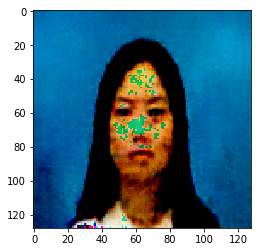

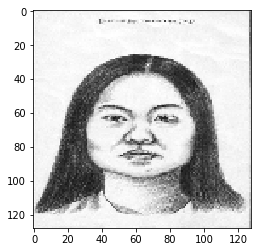

###################################


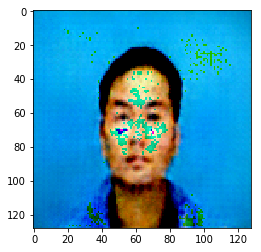

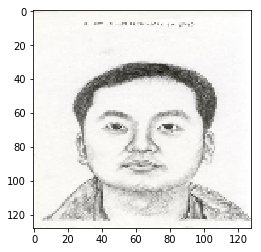

###################################


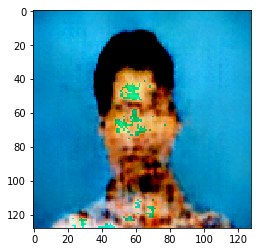

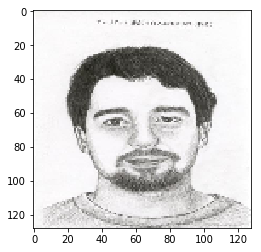

###################################


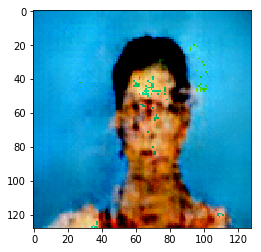

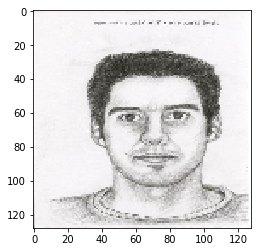

In [25]:
import cv2 as cv
import matplotlib.pyplot as plt
def imshow(x ,gray=False):
    plt.imshow(x)
    plt.show()

temp_img=image.load_img("test.jpg",target_size=(128,128,3))
temp_img1=image.img_to_array(temp_img)-
a=np.zeros((1,128,128,3))
temp_img1=(temp_img1.astype(np.float32)-127.5)/127.5
a[0]=temp_img1.astype(np.float32)
result= g.predict(a)
#result=result*127.5+127.5
imshow(result[0])
imshow(temp_img)

print "###################################"

temp_img=image.load_img("test1.jpg",target_size=(128,128,3))
temp_img1=image.img_to_array(temp_img)
a=np.zeros((1,128,128,3))
temp_img1=(temp_img1.astype(np.float32)-127.5)/127.5
a[0]=temp_img1.astype(np.float32)
result= g.predict(a)
#result=result*127.5+127.5
imshow(result[0])
imshow(temp_img)

print "###################################"

temp_img=image.load_img("test2.jpg",target_size=(128,128,3))
temp_img1=image.img_to_array(temp_img)
a=np.zeros((1,128,128,3))
temp_img1=(temp_img1.astype(np.float32)-127.5)/127.5
a[0]=temp_img1.astype(np.float32)
result= g.predict(a)
#result=result*127.5+127.5
imshow(result[0])
imshow(temp_img)

print "###################################"

temp_img=image.load_img("test3.jpg",target_size=(128,128,3))
temp_img1=image.img_to_array(temp_img)
a=np.zeros((1,128,128,3))
temp_img1=(temp_img1.astype(np.float32)-127.5)/127.5
a[0]=temp_img1.astype(np.float32)
result= g.predict(a)
#result=result*127.5+127.5
imshow(result[0])
imshow(temp_img)
